# Phase 1: Data Preparation & Analysis

# 1. Importing the require library

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Preprocessing & Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Metrics & Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    RocCurveDisplay,
    ConfusionMatrixDisplay
)

In [2]:
warnings.filterwarnings("ignore")

# 2. loading and displaying data

In [3]:
df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")


In [4]:
display(df.head())

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


# 3. Exploratory Data Analysis (EDA) and visualization

In [5]:
# Statistical summary
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [6]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [7]:
# Dataset shape
print("Dataset Shape:", df.shape)

Dataset Shape: (1190, 12)


In [8]:
# Clean column names
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)

In [9]:
# Check missing values
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
st_slope               0
target                 0
dtype: int64


In [10]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Create overview table
overview_df = pd.DataFrame({
    'Feature': df.columns,
    'Data Type': [df[col].dtype for col in df.columns],
    'Missing Values': [df[col].isnull().sum() for col in df.columns]
})
overview_df.style.set_caption("Heart Disease Dataset Features Overview")\
                 .background_gradient(cmap="Blues", subset=["Missing Values"])\
                 .format({"Missing Values": "{:d}"})


,Feature,Data Type,Missing Values
0,age,int64,0
1,sex,int64,0
2,chest_pain_type,int64,0
3,resting_bp_s,int64,0
4,cholesterol,int64,0
5,fasting_blood_sugar,int64,0
6,resting_ecg,int64,0
7,max_heart_rate,int64,0
8,exercise_angina,int64,0
9,oldpeak,float64,0


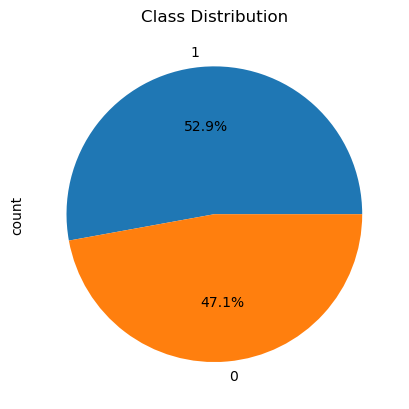

In [11]:
df['target'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

target
1    629
0    561
Name: count, dtype: int64


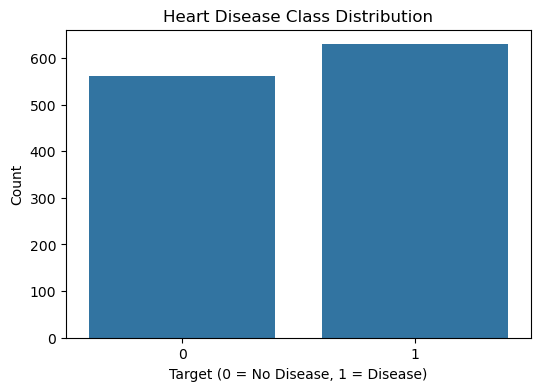

In [12]:
# Class distribution
print(df['target'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title('Heart Disease Class Distribution')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()


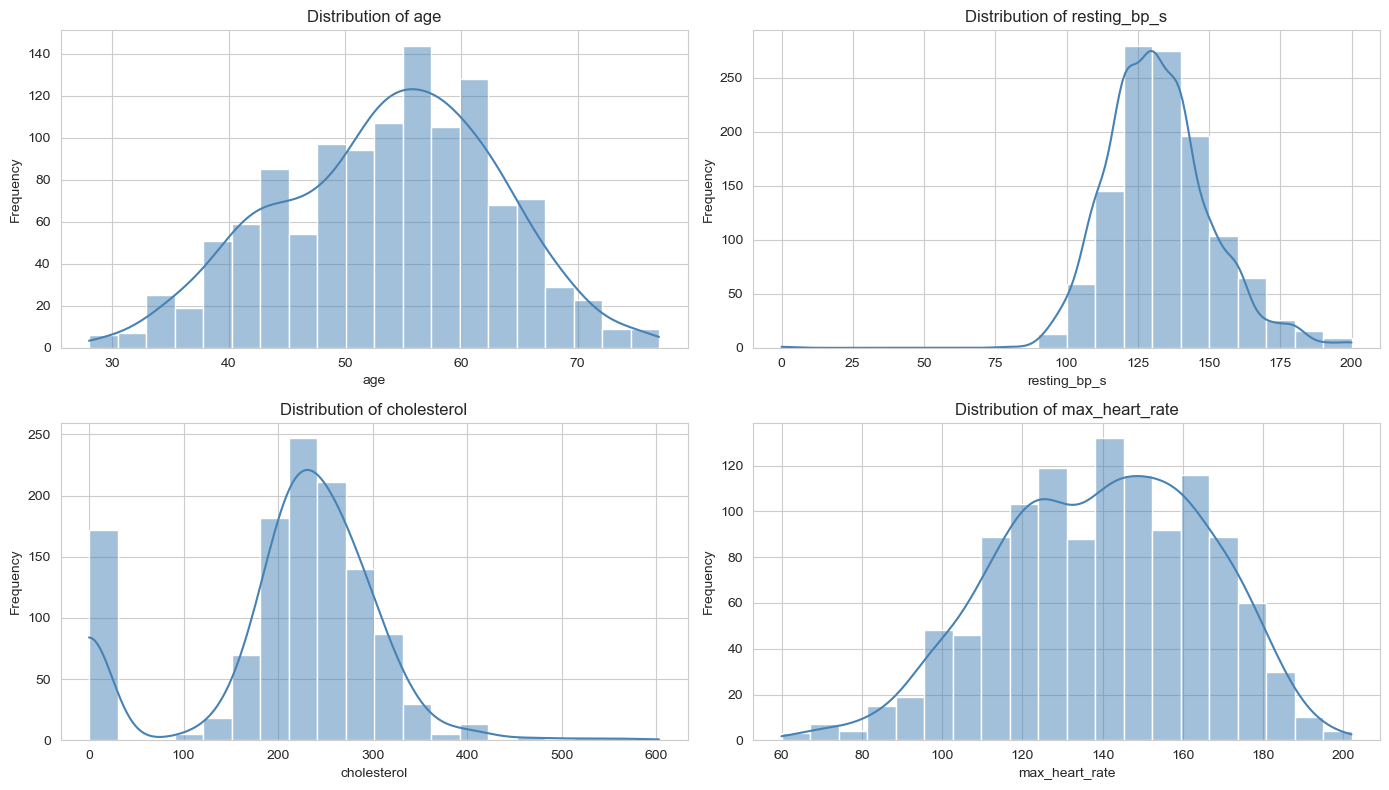

In [13]:
sns.set_style("whitegrid")

# --- PICTURE 1: Numerical Distributions (Understand the Population) ---
# Goal: Check if data is normal (bell curve) or skewed.

numerical_cols = ['age', 'resting_bp_s', 'cholesterol', 'max_heart_rate']

plt.figure(figsize=(14, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=20, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


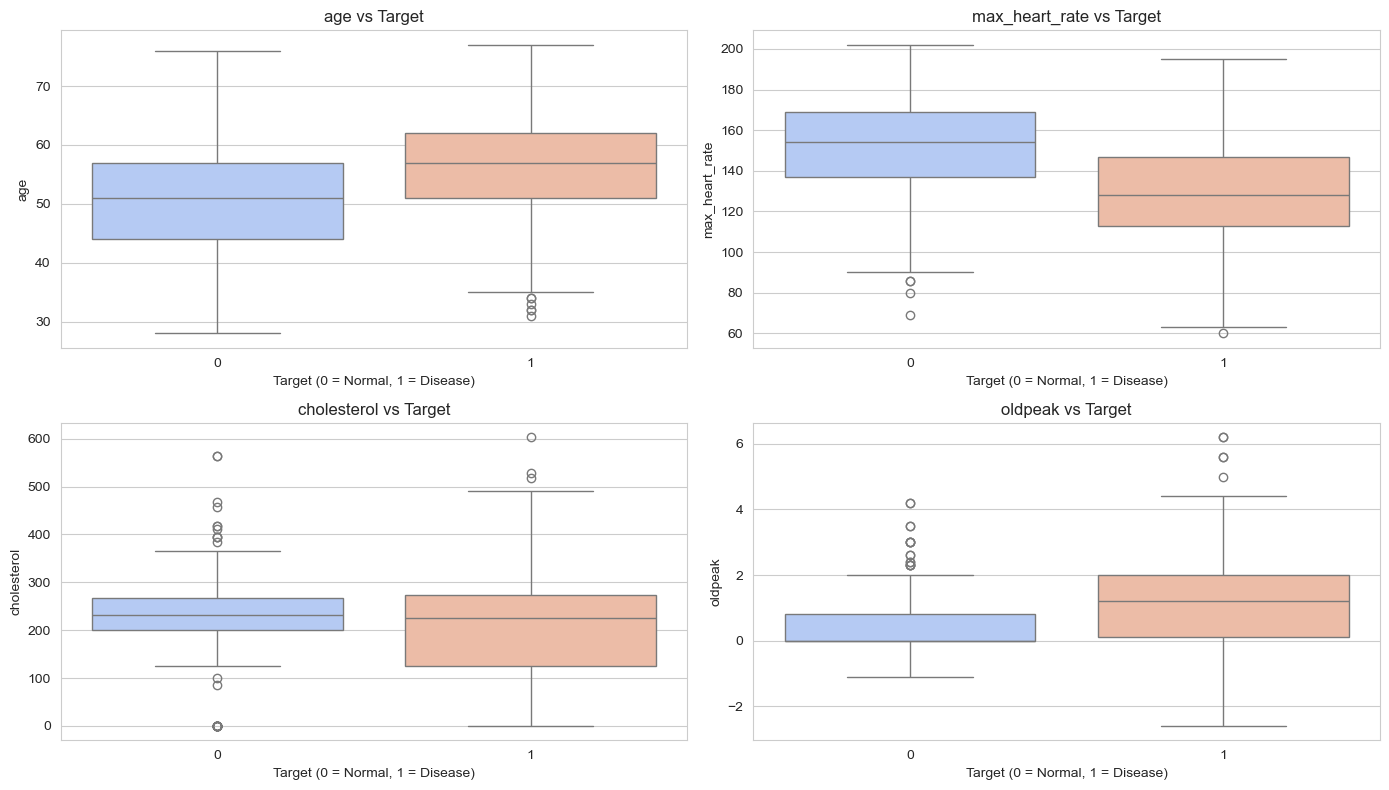

In [14]:
# --- PICTURE 2: Feature vs Target Comparison ---
# Goal: Observe how feature values differ between normal and diseased patients

comparison_cols = ['age', 'max_heart_rate', 'cholesterol', 'oldpeak']

plt.figure(figsize=(14, 8))

for i, col in enumerate(comparison_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='target', y=col, palette='coolwarm')
    plt.title(f'{col} vs Target')
    plt.xlabel('Target (0 = Normal, 1 = Disease)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


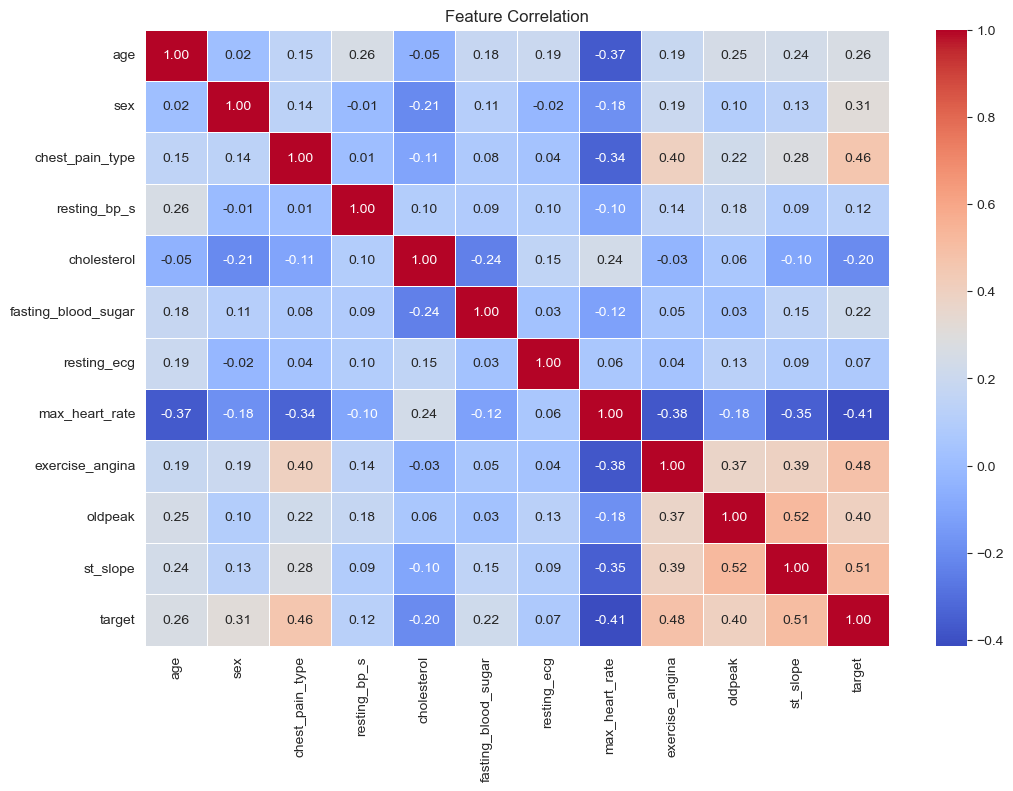

In [15]:
# --- Feature Correlation Analysis (Same as HTML/PDF) ---

plt.figure(figsize=(12, 8))
sns.heatmap(
    df.corr(),
    annot=True,          # numbers shown (same as HTML/PDF)
    cmap='coolwarm',
    fmt=".2f",           # 2 decimal places (important)
    linewidths=0.5
)
plt.title('Feature Correlation')
plt.show()


# 4. Data Cleaning and Preprocessing

In [16]:
#finding duplicate data
num_duplicates = df.duplicated().sum()
print(f"\nTotal duplicate rows found: {num_duplicates}")
print(f"Percentage of duplicates: {(num_duplicates/len(df)*100):.2f}%")


Total duplicate rows found: 272
Percentage of duplicates: 22.86%


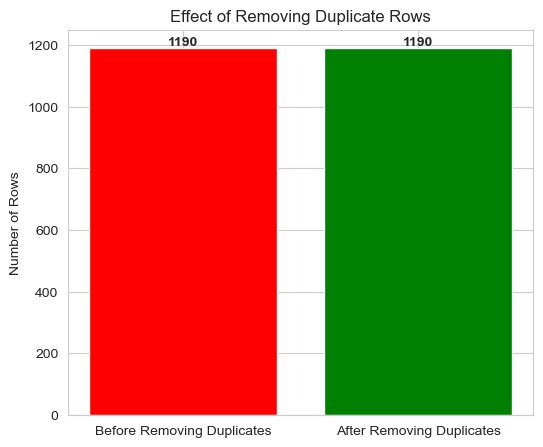

In [17]:
#removing duplicates
before = 1190  # original number of rows
after = df.shape[0]  # new number of rows

plt.figure(figsize=(6,5))
plt.bar(['Before Removing Duplicates', 'After Removing Duplicates'], [before, after], color=['red', 'green'])
plt.title('Effect of Removing Duplicate Rows')
plt.ylabel('Number of Rows')
for i, v in enumerate([before, after]):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')
plt.show()

In [18]:
# removing beacuse duplicate date found in it 
df = df.drop_duplicates()
print(f"New shape after removing duplicates: {df.shape}")

New shape after removing duplicates: (918, 12)


In [19]:
df.columns = (
    df.columns
    .str.strip()               # remove leading/trailing spaces
    .str.replace(r'[^A-Za-z0-9]+', '_', regex=True)  # replace non-alphanumeric chars with _
    .str.strip('_')            # remove leading/trailing underscores
    .str.lower()               # make lowercase
)
print("Cleaned column names:")
print(df.columns.tolist())

Cleaned column names:
['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_angina', 'oldpeak', 'st_slope', 'target']


# 5. Data Splitting and Feature 

In [20]:
df.columns = (
    df.columns
    .str.strip()
    .str.replace(r' [^A-Za-z0-9]+', '_', regex=True)
    .str.strip('_')
    .str.lower()
)
cols_to_drop = ['target']

# Check if age_group exists and drop it to prevent the error
if 'age_group' in df.columns:
    cols_to_drop.append('age_group')

X = df.drop(cols_to_drop, axis=1)
y = df['target']

# 3. Split the Data FIRST (Prevent Leakage)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
numeric_cols = ['age', 'resting_bp_s', 'cholesterol', 'max_heart_rate', 'oldpeak']

# 5. Scale the Data (Fit on Train, Transform Test)
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Data successfully split and scaled.")
print(f"Features included in training: {X.columns.tolist()}") 


Data successfully split and scaled.
Features included in training: ['age', 'sex', 'chest_pain_type', 'resting_bp_s', 'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 'exercise_angina', 'oldpeak', 'st_slope']


# Phase 2: Model Implementation

# 6. Implement 3 diffrent model 


# 6.1 Model 1: Logistic Regression

In [21]:
# Logistic Regression model fiting
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
# frist initialize and Train the Model
# max_iter=1000 ensures the solver has enough time to find the best fit
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# preparing for Predictions
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]  # Probability for positive class (1)

# print of Evaluation
print(" Logistic Regression Performance ")
acc_lr = accuracy_score(y_test, y_pred_lr)
roc_lr = roc_auc_score(y_test, y_prob_lr)

print(f"Accuracy: {acc_lr:.4f}")
print(f"ROC-AUC Score: {roc_lr:.4f}")
print("\nDetailed Classification Metrics:")
print(classification_report(y_test, y_pred_lr))

 Logistic Regression Performance 
Accuracy: 0.8804
ROC-AUC Score: 0.9014

Detailed Classification Metrics:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86        82
           1       0.86      0.93      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184



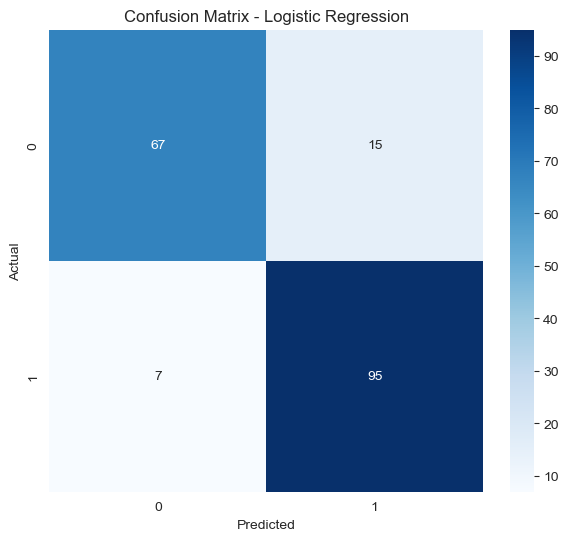

In [23]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

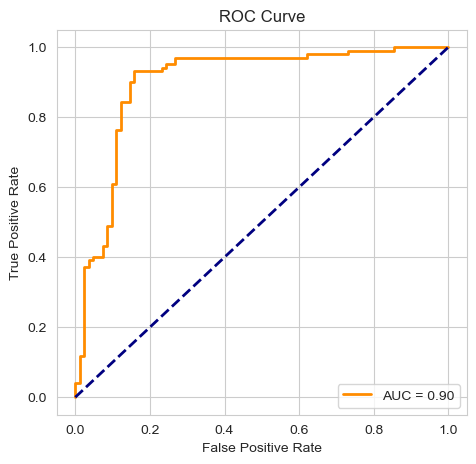

In [24]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 2)
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_lr:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

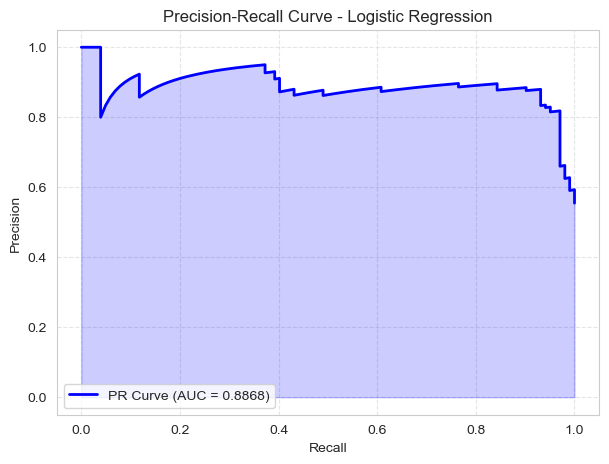

In [25]:
# Import the necessary function
from sklearn.metrics import precision_recall_curve, auc  # Added import for auc function

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_lr)
pr_auc = auc(recall, precision) 

plt.figure(figsize=(7, 5))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.4f})')
plt.fill_between(recall, precision, alpha=0.2, color='blue')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend(loc='lower left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

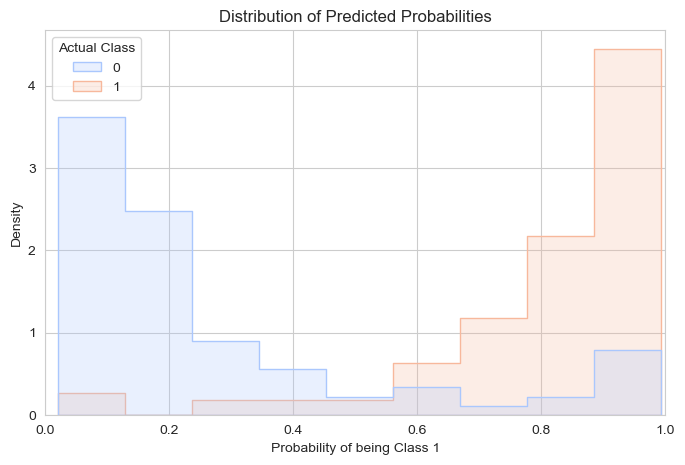

In [26]:
# Creating a temporary DataFrame for plotting
plot_data = pd.DataFrame({
    'Actual Class': y_test,
    'Predicted Probability': y_prob_lr
})

plt.figure(figsize=(8, 5))
# Plot the histogram
sns.histplot(data=plot_data, x='Predicted Probability', hue='Actual Class', 
             element="step", stat="density", common_norm=False, palette='coolwarm')

plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Probability of being Class 1")
plt.ylabel("Density")
plt.xlim(0, 1)
plt.show()

# 7.2 Model 2: Random Forest Classifier

In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest Performance")
acc_rf = accuracy_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"Accuracy: {acc_rf:.4f}")
print(f"ROC-AUC Score: {roc_rf:.4f}")
print("\nDetailed Classification Metrics:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance
Accuracy: 0.8859
ROC-AUC Score: 0.9300

Detailed Classification Metrics:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



Text(122.72222222222221, 0.5, 'Actual')

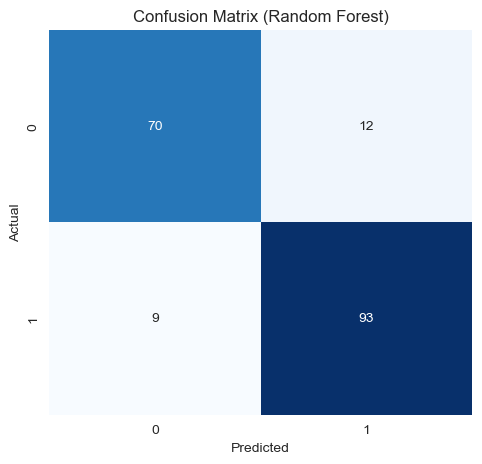

In [28]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

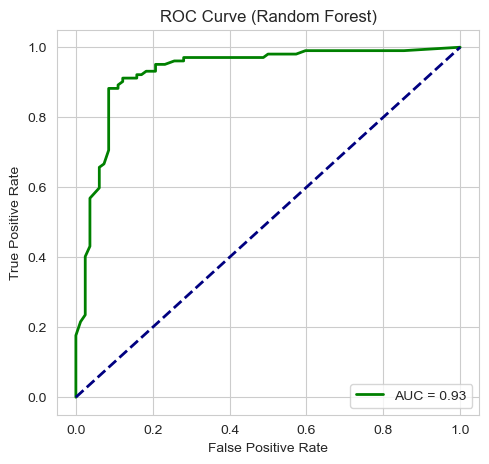

In [29]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr, tpr, color='green', lw=2, label=f'AUC = {roc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc="lower right")

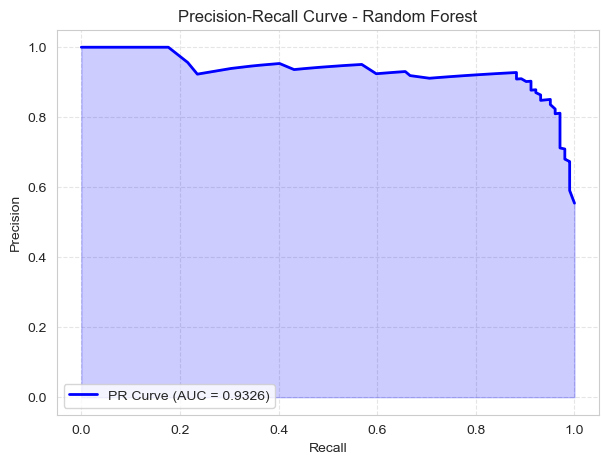

In [30]:
#precision, recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_rf)
pr_auc = auc(recall, precision)  # area under PR curve

#Ploting the curve
plt.figure(figsize=(7, 5))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AUC = {pr_auc:.4f})')
plt.fill_between(recall, precision, alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.legend(loc='lower left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [31]:
# Accuracy table
accuracy_df = pd.DataFrame({"Metric": ["Accuracy"], "Score": [accuracy_score(y_test, y_pred_rf)]})
accuracy_df.style.set_caption("Random Forest Accuracy").background_gradient(cmap="Greens").format("{:.2f}")
# Classification Report table
clf_df_rf = pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict=True)).transpose().round(2)
clf_df_rf.style.set_caption("Random Forest Classification Report").background_gradient(cmap="Blues").format("{:.2f}")

,precision,recall,f1-score,support
0,0.89,0.85,0.87,82.00
1,0.89,0.91,0.90,102.00
accuracy,0.89,0.89,0.89,0.89
macro avg,0.89,0.88,0.88,184.00
weighted avg,0.89,0.89,0.89,184.00


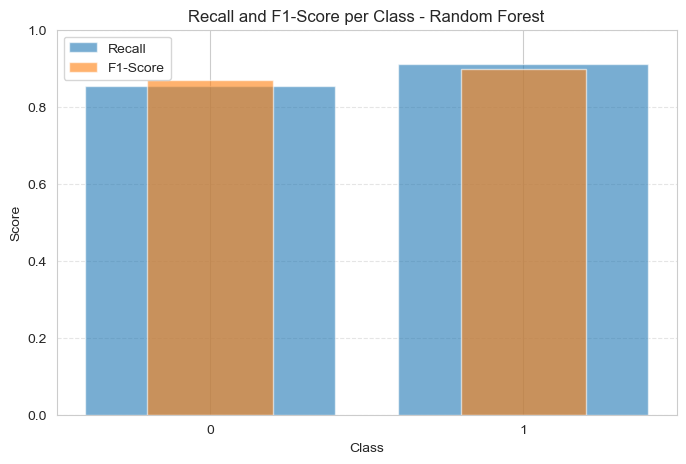

In [32]:
clf_report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

classes = [c for c in clf_report_rf.keys()
           if c not in ["accuracy", "macro avg", "weighted avg"]]

recall_values = [clf_report_rf[c]["recall"] for c in classes]
f1_values = [clf_report_rf[c]["f1-score"] for c in classes]

plt.figure(figsize=(8,5))
plt.bar(classes, recall_values, alpha=0.6, label='Recall')
plt.bar(classes, f1_values, alpha=0.6, label='F1-Score', width=0.4)
plt.xlabel("Class")
plt.ylabel("Score")
plt.title("Recall and F1-Score per Class - Random Forest")
plt.ylim(0,1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [33]:
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False).reset_index(drop=True)

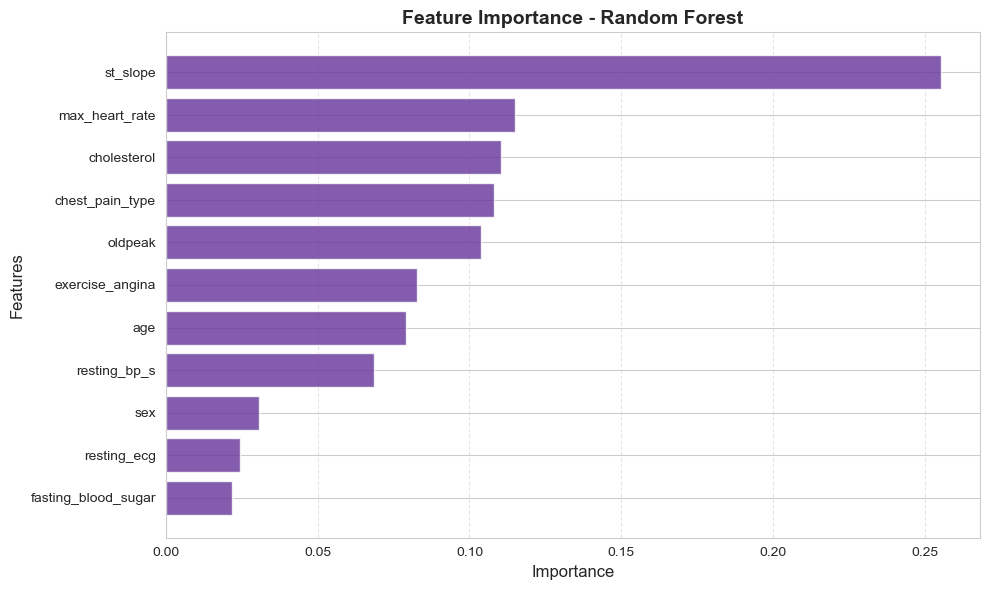

In [34]:
#Plotting Feature Importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], 
         color='rebeccapurple', alpha=0.8) # Matches your table's 'Purples' theme

plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')

plt.gca().invert_yaxis()  # Puts the most important feature at the top
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 6.3 Model 3: Decision Tree Classifier

In [35]:
sns.set_palette("husl")
plt.style.use('seaborn-v0_8-darkgrid')

In [36]:
dt_model = DecisionTreeClassifier(
    criterion='gini',           
    max_depth=5,              
    min_samples_split=10,       
    min_samples_leaf=5,         
    random_state=42
)

In [37]:
# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [38]:
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

In [39]:
# Calculate all metrics
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_dt = roc_auc_score(y_test, y_prob_dt)


In [40]:
# Create performance table
dt_results_table = pd.DataFrame({
    "Model": ["Decision Tree"],
    "Accuracy": [acc_dt],
    "Precision": [prec_dt],
    "Recall": [rec_dt],
    "F1-Score": [f1_dt],
    "ROC-AUC": [roc_dt]
})
print("DECISION TREE MODEL PERFORMANCE")
print(dt_results_table.to_string(index=False))
print("\n")
print("\nDetailed Classification Metrics:")
print(classification_report(y_test, y_pred_dt))

DECISION TREE MODEL PERFORMANCE
        Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Decision Tree  0.788043   0.818182 0.794118   0.80597 0.860892



Detailed Classification Metrics:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        82
           1       0.82      0.79      0.81       102

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.79      0.79      0.79       184



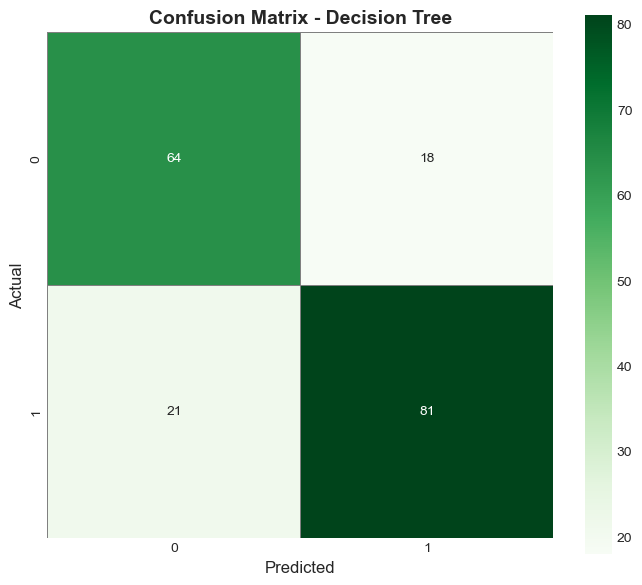

In [41]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(7, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', 
            linewidths=0.5, linecolor='gray', square=True, cbar=True)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.title("Confusion Matrix - Decision Tree", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

<Figure size 700x600 with 0 Axes>

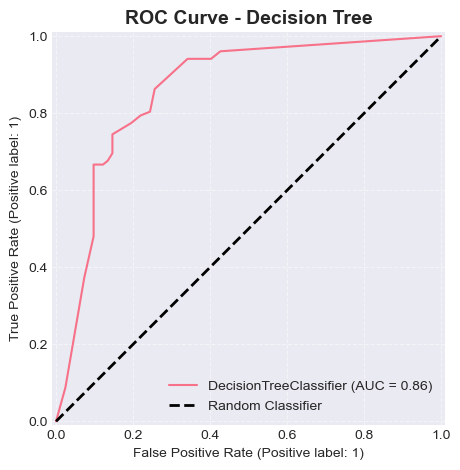

In [42]:
#ROC CURVE
plt.figure(figsize=(7, 6))
RocCurveDisplay.from_estimator(dt_model, X_test, y_test)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.title('ROC Curve - Decision Tree', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

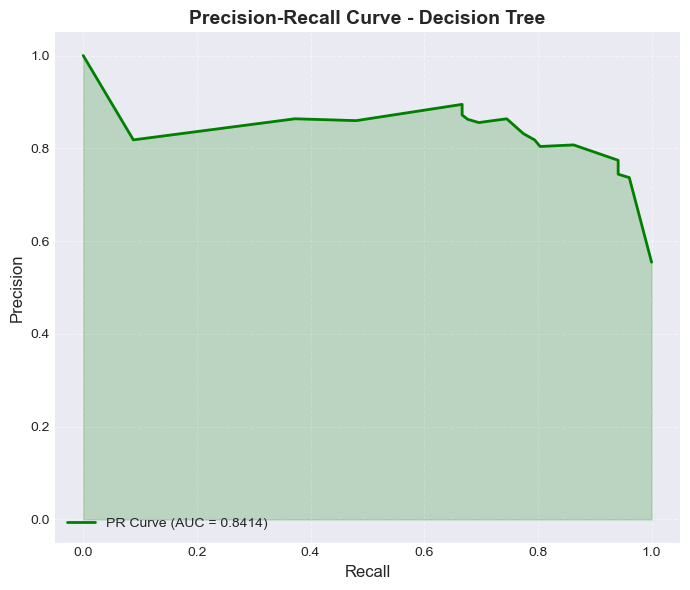

In [43]:
#precision recall cure 
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_dt)
pr_auc = auc(recall, precision)
plt.figure(figsize=(7, 6))
plt.plot(recall, precision, color='green', lw=2, 
         label=f'PR Curve (AUC = {pr_auc:.4f})')
plt.fill_between(recall, precision, alpha=0.2, color='green')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve - Decision Tree', fontsize=14, fontweight='bold')
plt.legend(loc='lower left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

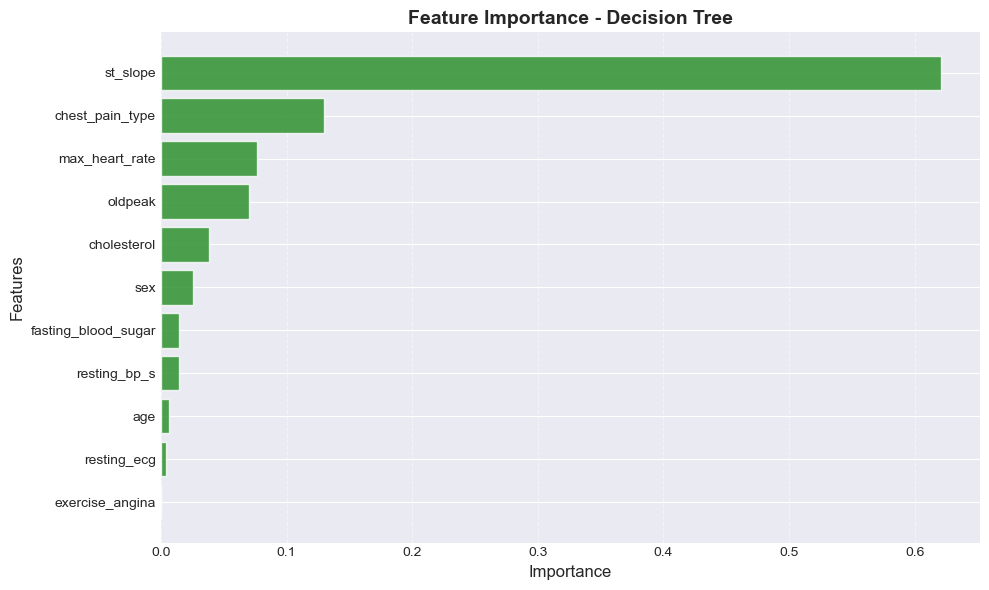

In [58]:
#feature importance of decision tree
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_dt['Feature'], feature_importance_dt['Importance'], 
         color='forestgreen', alpha=0.8)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance - Decision Tree', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Phase 3: Final Evaluation & Optimization

# 7. Analysis of Overfitting and Hyperparameter Tuning

In [45]:
# Create the performance DataFrame
dt_results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"],
    "Score": [
        accuracy_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_dt),
        roc_auc_score(y_test, y_prob_dt)
    ]
})

# Transpose for horizontal display
dt_results_h = dt_results.set_index("Metric").T

# Display nicely with simple formatting
styled_table = dt_results_h.style\
    .set_caption("Decision Tree Performance Metrics ")\
    .set_properties(**{
        'text-align': 'center',
        'font-size': '14pt',
        'font-weight': 'bold'
    })\
    .format("{:.4f}")

display(styled_table)

Metric,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Score,0.7880,0.8182,0.7941,0.8060,0.8609


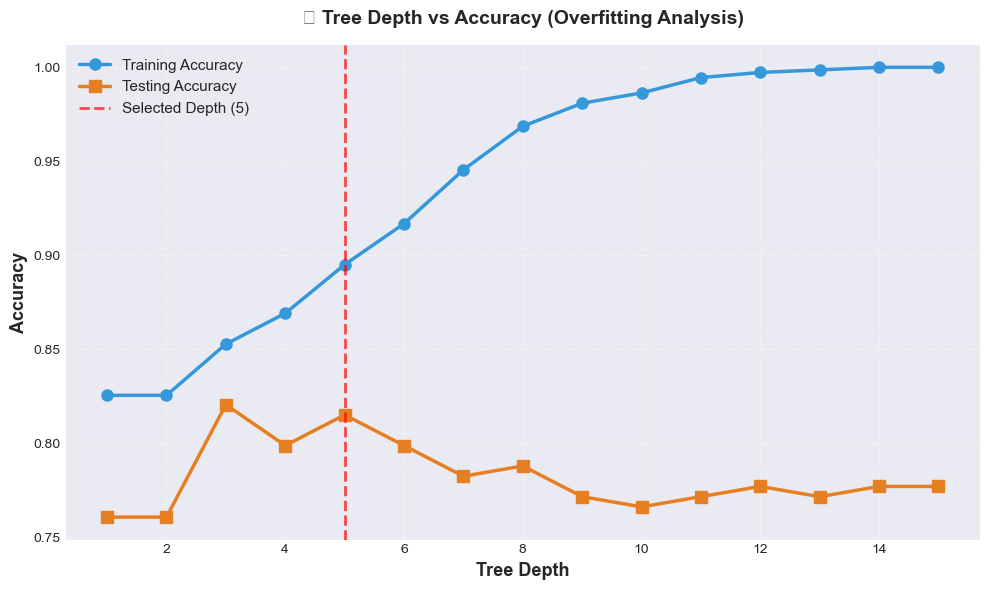

In [46]:
#Overfitting Check analysis
depths = range(1, 16)
train_scores = []
test_scores = []

for depth in depths:
    dt_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_temp.fit(X_train, y_train)
    train_scores.append(dt_temp.score(X_train, y_train))
    test_scores.append(dt_temp.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, 'o-', label='Training Accuracy', 
         linewidth=2.5, markersize=8, color='#3498DB')
plt.plot(depths, test_scores, 's-', label='Testing Accuracy', 
         linewidth=2.5, markersize=8, color='#E67E22')
plt.axvline(x=5, color='red', linestyle='--', linewidth=2, 
            label='Selected Depth (5)', alpha=0.7)
plt.xlabel('Tree Depth', fontsize=13, fontweight='bold')
plt.ylabel('Accuracy', fontsize=13, fontweight='bold')
plt.title('📊 Tree Depth vs Accuracy (Overfitting Analysis)', 
          fontsize=14, fontweight='bold', pad=15)
plt.legend(fontsize=11, framealpha=0.9)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 8. Advanced Model Evaluation

# showing good convergence (low bias/variance)

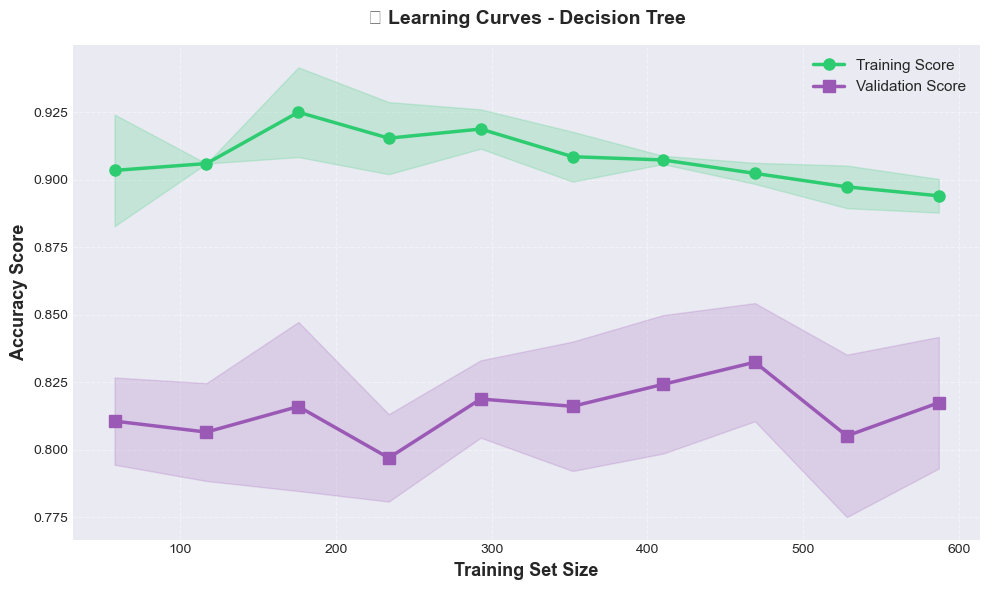

In [47]:
train_sizes, train_scores_lc, val_scores_lc = learning_curve(
    dt_model, X_train, y_train, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy', random_state=42
)
train_mean = train_scores_lc.mean(axis=1)
train_std = train_scores_lc.std(axis=1)
val_mean = val_scores_lc.mean(axis=1)
val_std = val_scores_lc.std(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Score', 
         linewidth=2.5, markersize=8, color='#2ECC71')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                 alpha=0.2, color='#2ECC71')
plt.plot(train_sizes, val_mean, 's-', label='Validation Score', 
         linewidth=2.5, markersize=8, color='#9B59B6')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, 
                 alpha=0.2, color='#9B59B6')
plt.xlabel('Training Set Size', fontsize=13, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=13, fontweight='bold')
plt.title('📈 Learning Curves - Decision Tree', fontsize=14, 
          fontweight='bold', pad=15)
plt.legend(fontsize=11, framealpha=0.9)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [48]:
feature_importance_dt = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": dt_model.feature_importances_
}).sort_values(by="Importance", ascending=False).reset_index(drop=True)

print("FEATURE IMPORTANCE - DECISION TREE")

print(feature_importance_dt.to_string(index=False))

FEATURE IMPORTANCE - DECISION TREE
            Feature  Importance
           st_slope    0.620953
    chest_pain_type    0.129562
     max_heart_rate    0.076537
            oldpeak    0.070018
        cholesterol    0.038395
                sex    0.025364
fasting_blood_sugar    0.014637
       resting_bp_s    0.014135
                age    0.006569
        resting_ecg    0.003832
    exercise_angina    0.000000


In [49]:
print("DECISION TREE STRUCTURE SUMMARY")
print(f"Tree Depth: {dt_model.get_depth()}")
print(f"Number of Leaves: {dt_model.get_n_leaves()}")
print(f"Number of Features Used: {(dt_model.feature_importances_ > 0).sum()}")

DECISION TREE STRUCTURE SUMMARY
Tree Depth: 5
Number of Leaves: 27
Number of Features Used: 10


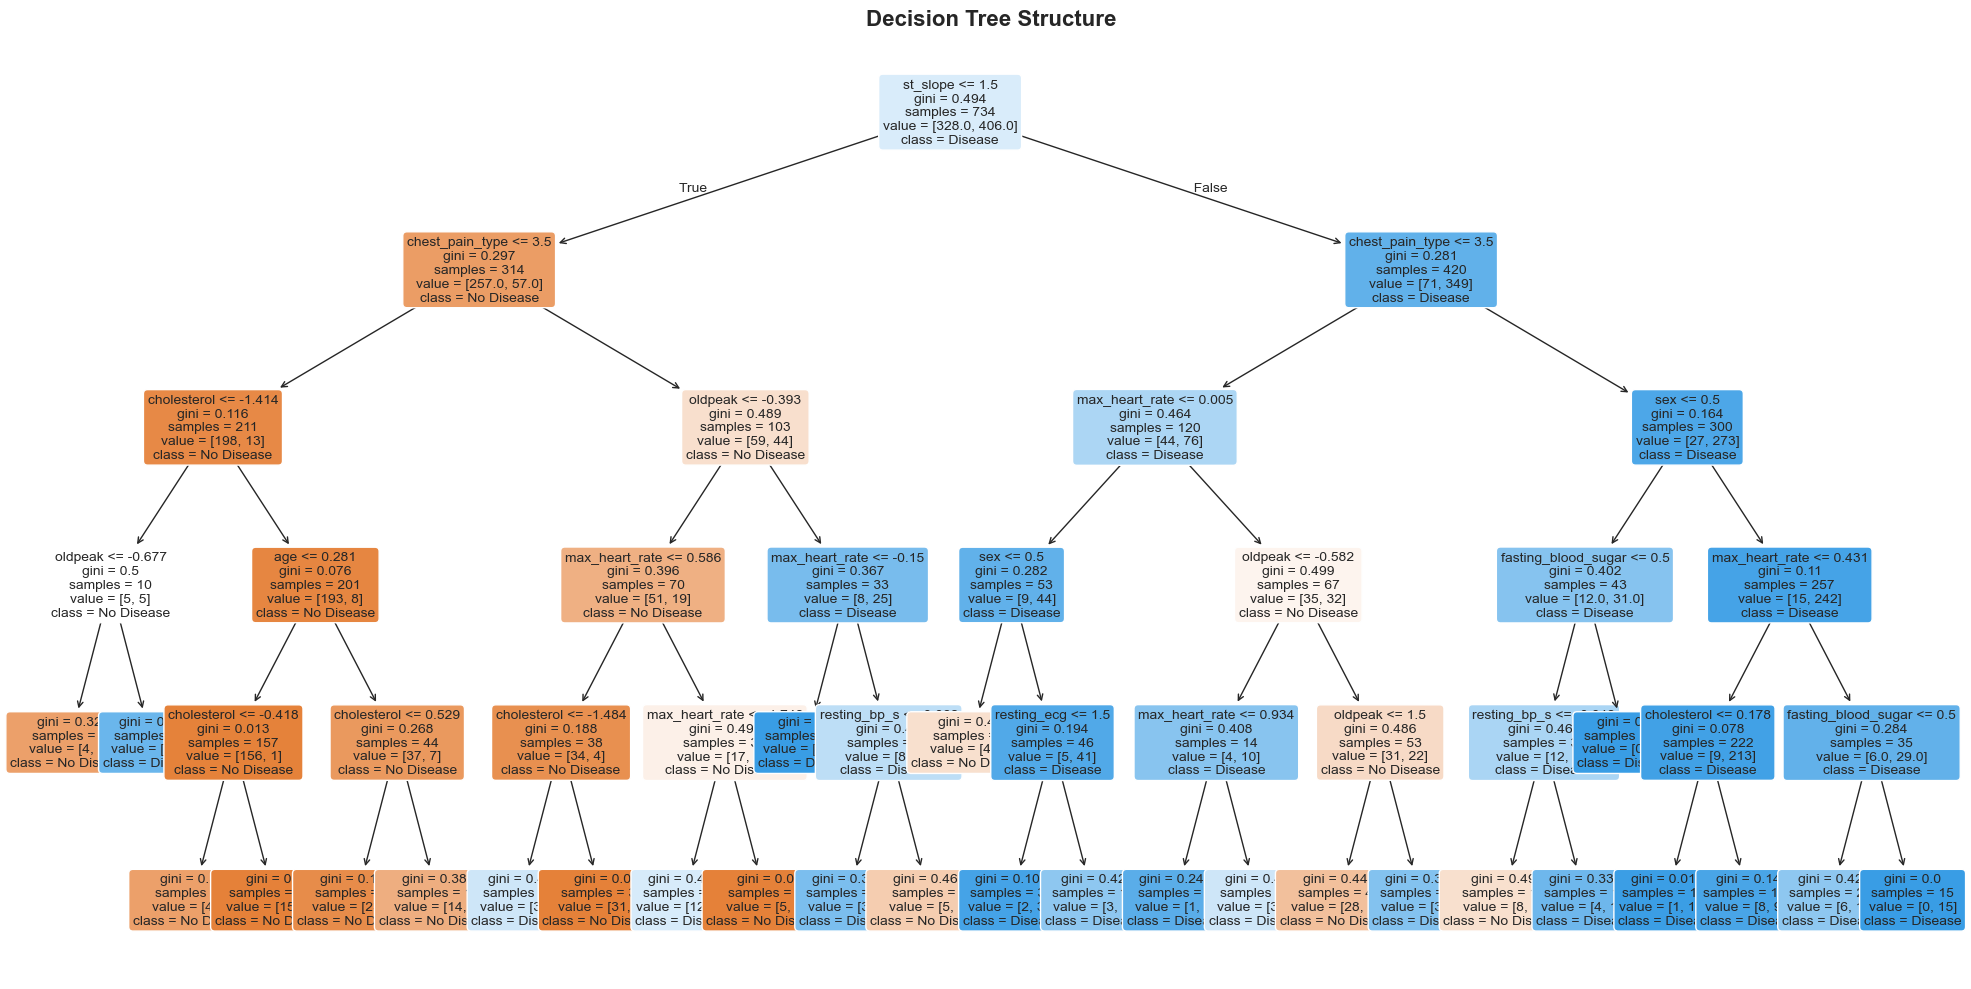

In [50]:
# Import the tree module from scikit-learn
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(dt_model, 
               feature_names=X_train.columns,
               class_names=['No Disease', 'Disease'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Decision Tree Structure', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 9. Final Model Comparison and Conclusion

In [51]:
# Compare with all the previous models 

In [52]:
data = {
    "Model": ["Logistic Regression", "Random Forest", "Decision Tree"],
    "Accuracy": ["High", "Highest", "Lowest"],
    "Recall (Disease)": ["Very High", "High", "Medium"],
    "ROC-AUC": [0.90, 0.93, 0.86],
    "Interpretability": ["Very High", "Medium", "Very High"]
}

df = pd.DataFrame(data)
df

,Model,Accuracy,Recall (Disease),ROC-AUC,Interpretability
0,Logistic Regression,High,Very High,0.90,Very High
1,Random Forest,Highest,High,0.93,Medium
2,Decision Tree,Lowest,Medium,0.86,Very High


In [53]:
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Decision Tree"],
    "Accuracy": [0.8804, 0.8859, accuracy_score(y_test, y_pred_dt)],
    "Precision": [0.8588, 0.8864, precision_score(y_test, y_pred_dt)],
    "Recall": [0.9314, 0.9118, recall_score(y_test, y_pred_dt)],
    "F1-Score": [0.8937, 0.8989, f1_score(y_test, y_pred_dt)],
    "ROC-AUC": [0.9049, 0.9298, roc_auc_score(y_test, y_prob_dt)]
})
comparison_h = comparison.set_index("Model").T

comparison_styled = comparison_h.style\
    .set_caption(" Model Performance Comparison ")\
    .set_properties(**{
        'text-align': 'center',
        'font-size': '13pt',
        'font-weight': 'bold',
        'color': '#1B2631'
    })\
    .set_table_styles([
        {'selector': 'th', 'props': [
            ('font-size', '14pt'),
            ('font-weight', 'bold'),
            ('text-align', 'center'),
            ('padding', '8px'),
            ('border-bottom', '1px solid #BDC3C7')
        ]},
        {'selector': 'td', 'props': [
            ('padding', '8px'),
            ('text-align', 'center'),
            ('border-bottom', '1px solid #E5E7E9')
        ]},
        {'selector': '', 'props': [
            ('border-collapse', 'collapse'),
            ('margin', '20px auto')
        ]}
    ])\
    .format("{:.4f}")
display(comparison_styled)

Model,Logistic Regression,Random Forest,Decision Tree
Accuracy,0.8804,0.8859,0.7880
Precision,0.8588,0.8864,0.8182
Recall,0.9314,0.9118,0.7941
F1-Score,0.8937,0.8989,0.8060
ROC-AUC,0.9049,0.9298,0.8609


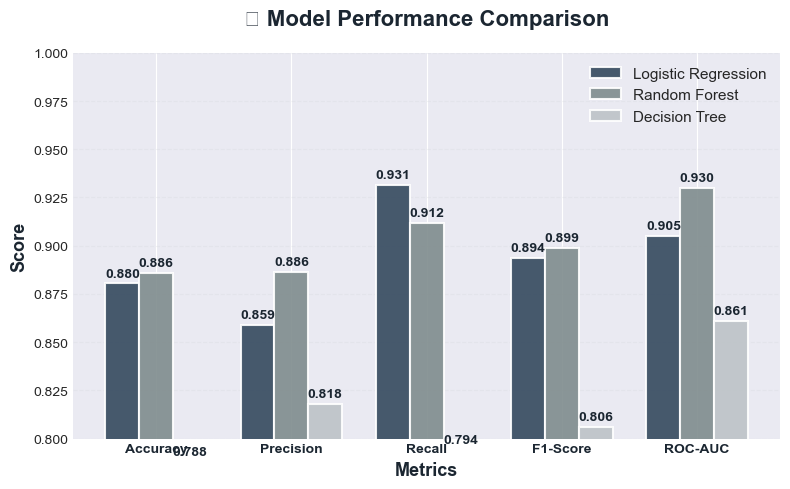

In [54]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x = np.arange(len(metrics))
width = 0.25
fig, ax = plt.subplots(figsize=(8, 5))
colors = ['#34495E', '#7F8C8D', '#BDC3C7']  # Dark → medium → light gray

bars1 = ax.bar(x - width, comparison.iloc[0, 1:], width, 
               label='Logistic Regression', color=colors[0], alpha=0.9, edgecolor='white', linewidth=1.5)
bars2 = ax.bar(x, comparison.iloc[1, 1:], width, 
               label='Random Forest', color=colors[1], alpha=0.9, edgecolor='white', linewidth=1.5)
bars3 = ax.bar(x + width, comparison.iloc[2, 1:], width, 
               label='Decision Tree', color=colors[2], alpha=0.9, edgecolor='white', linewidth=1.5)

ax.set_xlabel('Metrics', fontsize=13, fontweight='bold', color='#1B2631')
ax.set_ylabel('Score', fontsize=13, fontweight='bold', color='#1B2631')
ax.set_title('📊 Model Performance Comparison', fontsize=16, fontweight='bold', color='#1B2631', pad=20)


ax.set_xticks(x)
ax.set_xticklabels(metrics, fontweight='bold', color='#1B2631')
ax.legend(fontsize=11, frameon=False)
ax.set_ylim(0.8, 1.0)
ax.grid(axis='y', linestyle='--', alpha=0.3, color='#D5D8DC')

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.002,
                f'{height:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='#1B2631')

plt.tight_layout()
plt.show()


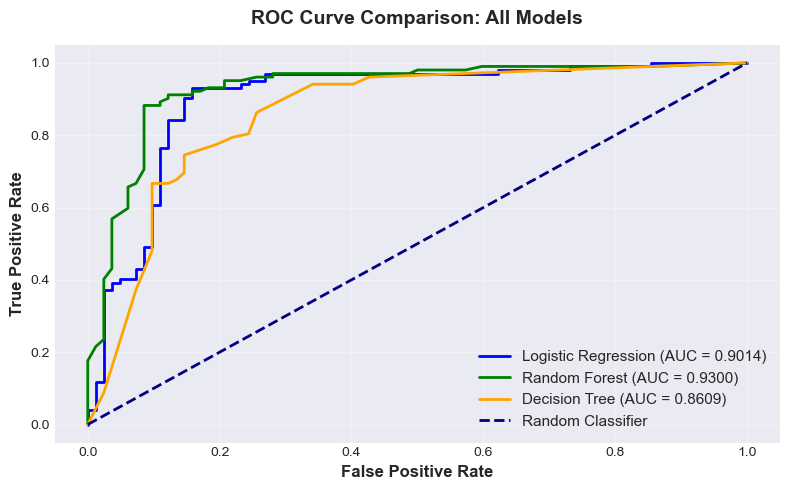

In [55]:
plt.figure(figsize=(8, 5))

y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = roc_auc_score(y_test, y_prob_lr)
# Plot
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.4f})', 
         color='blue', linewidth=2)

y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})', 
         color='green', linewidth=2)

y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.4f})', 
         color='orange', linewidth=2)

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', linewidth=2, label='Random Classifier')

# Labels and Title
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curve Comparison: All Models', fontsize=14, fontweight='bold', pad=15)
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, linestyle='-', alpha=0.3)
plt.tight_layout()

# Show Plot
plt.show()

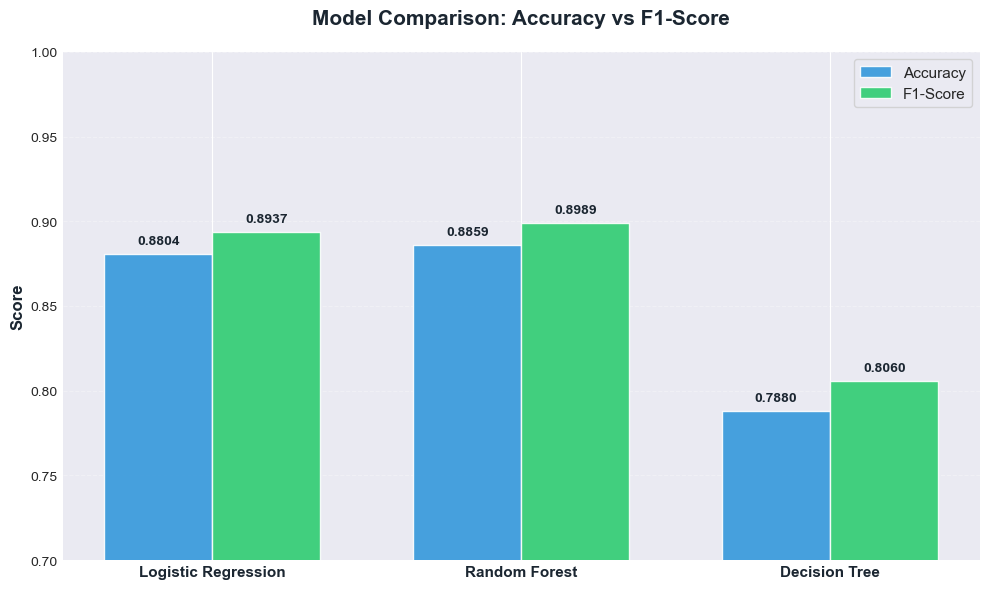

In [56]:
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracy = [0.8804, 0.8859, 0.7880]
f1_scores = [0.8937, 0.8989, 0.8060]

# 2. Plot Setup
x = np.arange(len(models))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# 3. Create Bars
rects1 = ax.bar(x - width/2, accuracy, width, label='Accuracy', color='#3498DB', alpha=0.9, edgecolor='white')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1-Score', color='#2ECC71', alpha=0.9, edgecolor='white')

# 4. Styling and Labels
ax.set_ylabel('Score', fontsize=12, fontweight='bold', color='#1B2631')
ax.set_title('Model Comparison: Accuracy vs F1-Score', fontsize=15, fontweight='bold', pad=20, color='#1B2631')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=11, fontweight='bold', color='#1B2631')
ax.set_ylim(0.70, 1.0) # Set limit to zoom in on the differences
ax.legend(loc='upper right', fontsize=11, frameon=True)
ax.grid(axis='y', linestyle='--', alpha=0.3)

# 5. Add Value Labels on Top
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 5 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold', color='#1B2631')
autolabel(rects1)
autolabel(rects2)
plt.tight_layout()
plt.show()

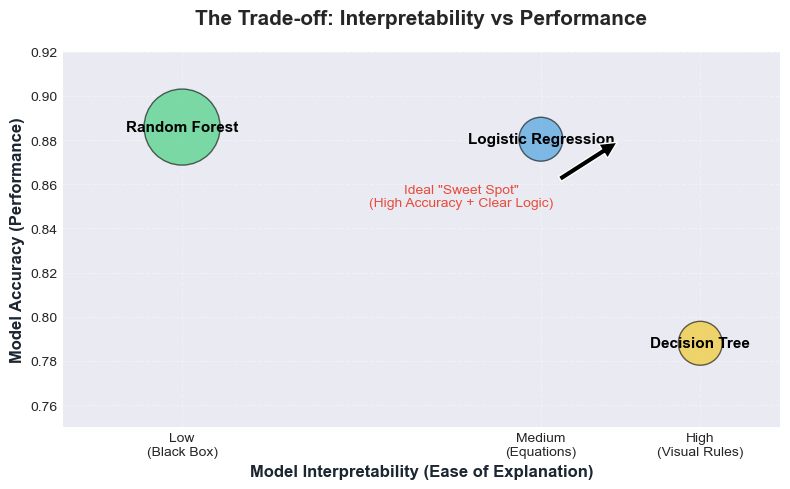

In [57]:
models = ['Decision Tree', 'Logistic Regression', 'Random Forest']
accuracy = [0.7880, 0.8804, 0.8859] 
interpretability = [9, 7, 2.5] # DT is very clear, LR is clear equations, RF is a "black box"
fig, ax = plt.subplots(figsize=(8, 5))

sizes = [1000, 1000, 3000] 
colors = ['#F1C40F', '#3498DB', '#2ECC71'] # Yellow, Blue, Green

scatter = ax.scatter(interpretability, accuracy, s=sizes, c=colors, alpha=0.6, edgecolors='black')

#Labels and Annotations
for i, txt in enumerate(models):
    ax.annotate(txt, (interpretability[i], accuracy[i]), 
                xytext=(0, 0), textcoords='offset points', 
                ha='center', va='center', fontweight='bold', fontsize=11, color='black')

# 5. Axes and Titles
ax.set_xlabel('Model Interpretability (Ease of Explanation)', fontsize=12, fontweight='bold', color='#1B2631')
ax.set_ylabel('Model Accuracy (Performance)', fontsize=12, fontweight='bold', color='#1B2631')
ax.set_title('The Trade-off: Interpretability vs Performance', fontsize=15, fontweight='bold', pad=20)

#make it qualitative
ax.set_xticks([2.5, 7, 9])
ax.set_xticklabels(['Low\n(Black Box)', 'Medium\n(Equations)', 'High\n(Visual Rules)'])


#high accuracy AND high interpretability (Top Right)
ax.annotate('Ideal "Sweet Spot"\n(High Accuracy + Clear Logic)', 
            xy=(8, 0.88), xytext=(6, 0.85),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=10, ha='center', color='#E74C3C')

ax.grid(True, linestyle='--', alpha=0.3)
ax.set_ylim(0.75, 0.92) # Zoom focus
ax.set_xlim(1, 10)

plt.tight_layout()
plt.show()